# Exploration of the MIT-BIH-Database

### **Loading the Data and first Exploration**

In [46]:
# Load packages and Data

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

mitbih_test_df = pd.read_csv("mitbih_test.csv")
mitbih_train_df = pd.read_csv("mitbih_train.csv")

In [25]:
# MIT-BIH Train;  Basic Statistic and Exploration

# Renaming the columns
new_column_names = range(1, len(mitbih_train_df.columns) + 1)
mitbih_train_df.columns = new_column_names

# Transforming the Target Variable to Integer
mitbih_train_df[188]=mitbih_train_df[188].astype(int)

mitbih_train_df.describe()
mitbih_train_df[188].value_counts()

188
0    72470
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [26]:
# MIT-BIH Test;  Basic Statistic and Exploration

# Renaming the columns
new_column_names = range(1, len(mitbih_test_df.columns) + 1)
mitbih_test_df.columns = new_column_names

# Transforming the Target Variable to Integer
mitbih_test_df[188]=mitbih_test_df[188].astype(int)

mitbih_test_df.info()
# mitbih_test_df.describe()
# mitbih_test_df[188].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1 to 188
dtypes: float64(187), int64(1)
memory usage: 31.4 MB


In [27]:
# Verification that the values of all explanatory variables are between 0 and 1
print(mitbih_train_df.iloc[:,:-1].max().max())
print(mitbih_train_df.iloc[:,:-1].min().min())
print(mitbih_test_df.iloc[:,:-1].max().max())
print(mitbih_test_df.iloc[:,:-1].min().min())

1.0
0.0
1.0
0.0


### **First Visualization**

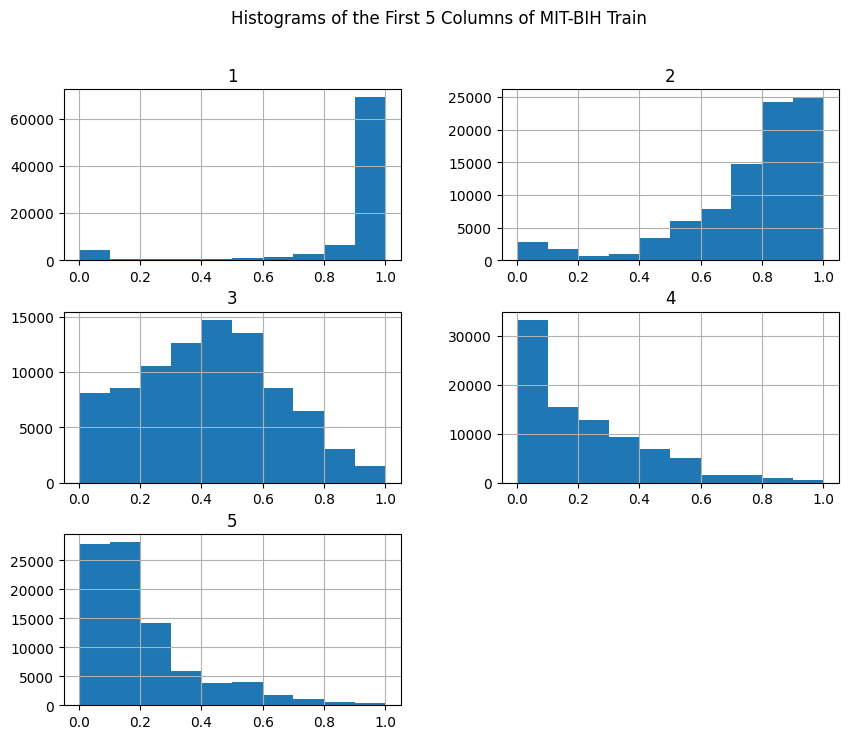

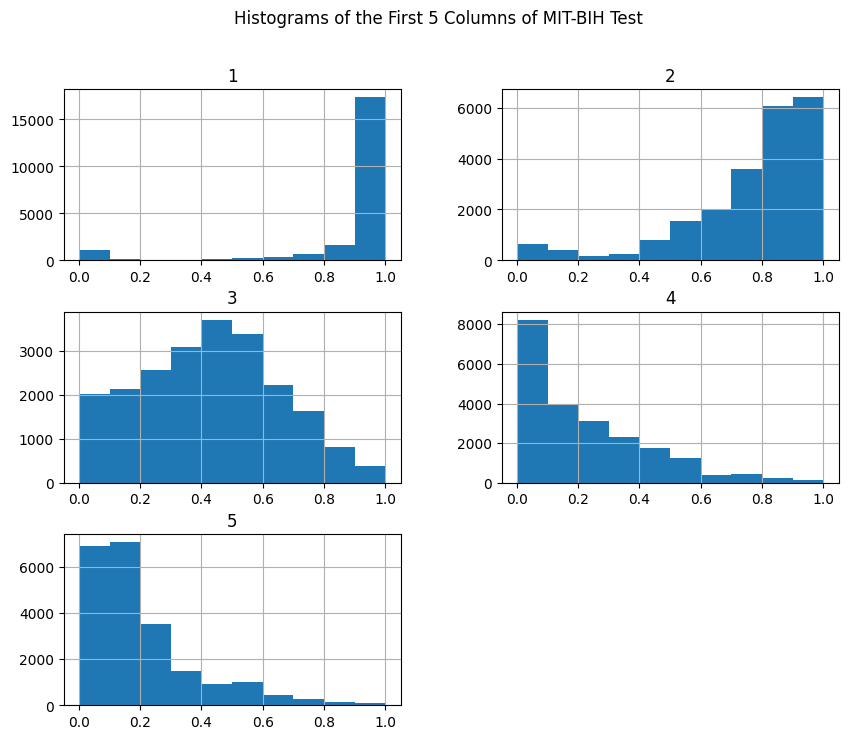

In [28]:
# Histograms of the first Columns

mitbih_train_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of MIT-BIH Train')
plt.show()
mitbih_test_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of MIT-BIH Test')
plt.show()

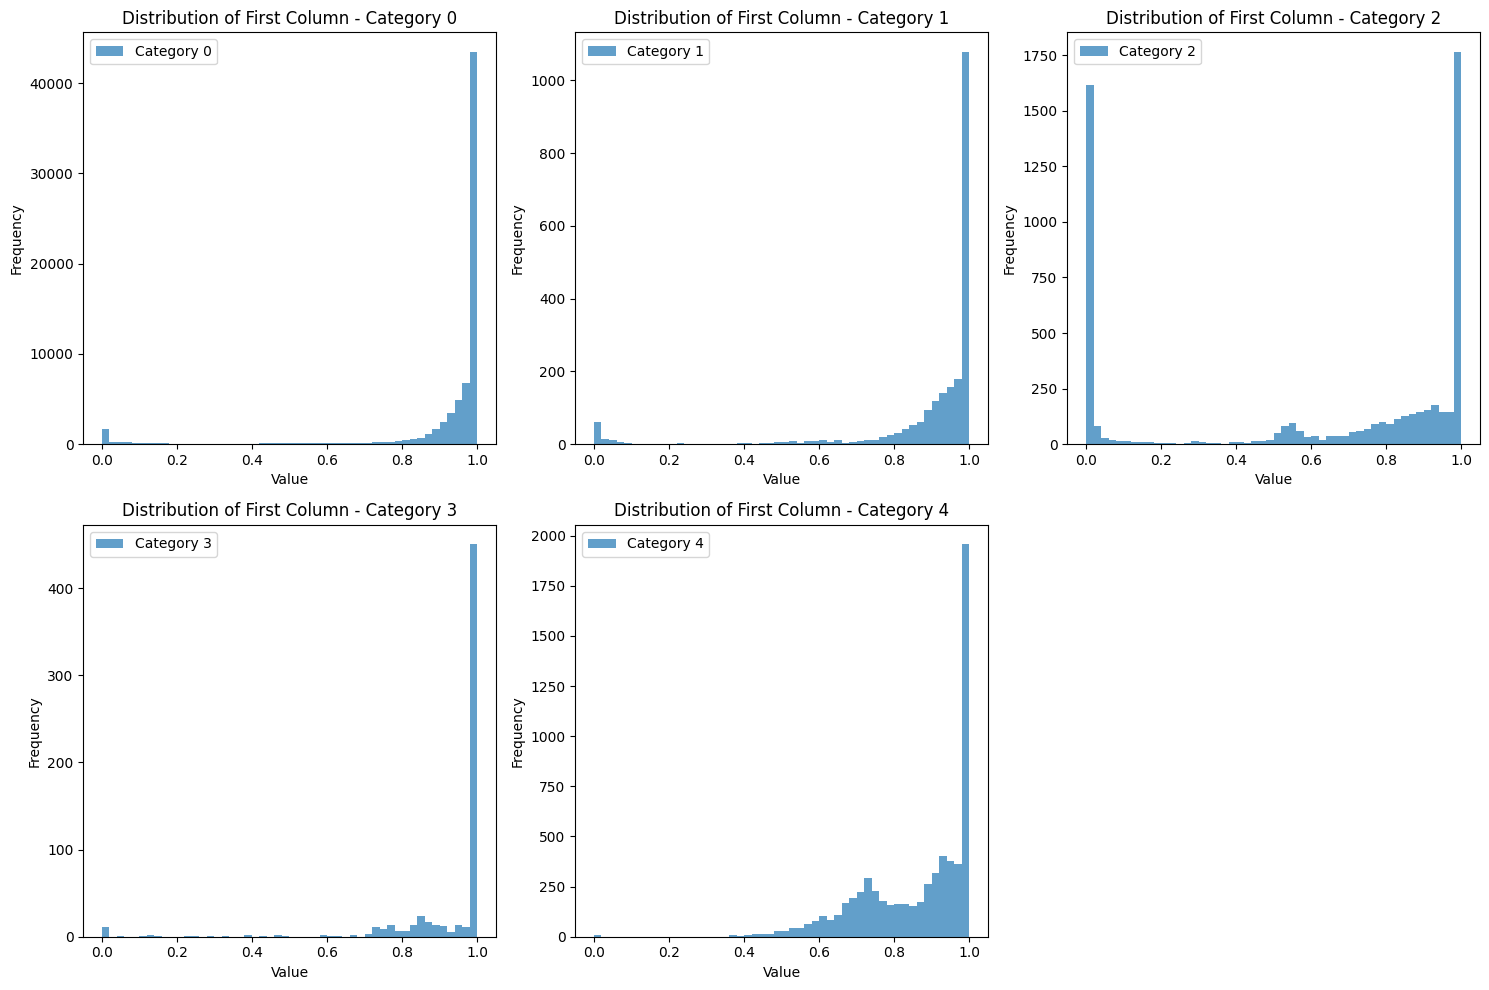

In [29]:
# Displaying the first Column - Plotting distributions seperated by category

plt.figure(figsize=(15, 10))

categories = mitbih_train_df[188].unique()
num_categories = len(categories)

for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    subset_df = mitbih_train_df[mitbih_train_df[188] == category]
    plt.hist(subset_df.iloc[:, 0], bins=50, alpha=0.7, label=f'Category {category}')
    plt.title(f'Distribution of First Column - Category {category}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

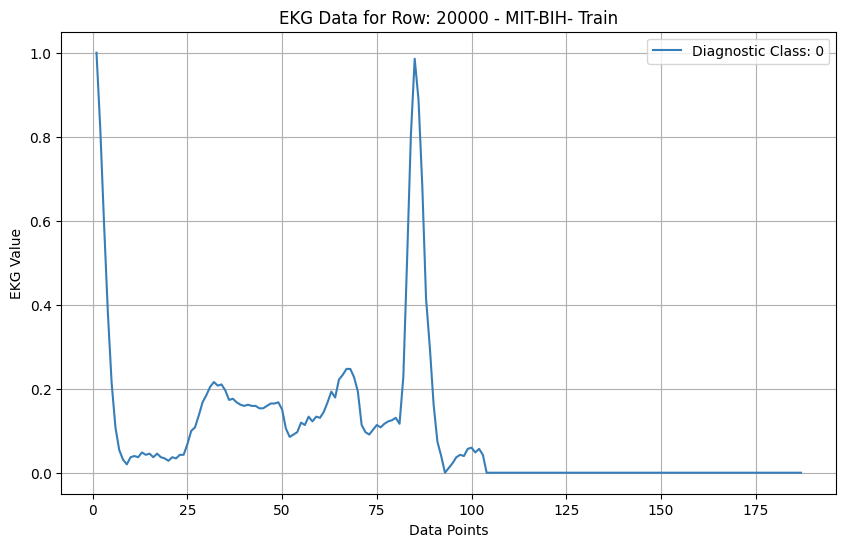

In [30]:
# Grafic Representation of raw Data (Single preprocessed EKG-Signal) - MIT-BIH Train 

# Choose Row to display: 
row_to_display = 20000

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), mitbih_train_df.iloc[row_to_display, :187], 
         label = f"Diagnostic Class: {mitbih_train_df.iloc[row_to_display, 187]}", color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for Row: {row_to_display} - MIT-BIH- Train')
plt.legend()
plt.grid(True)
plt.show();

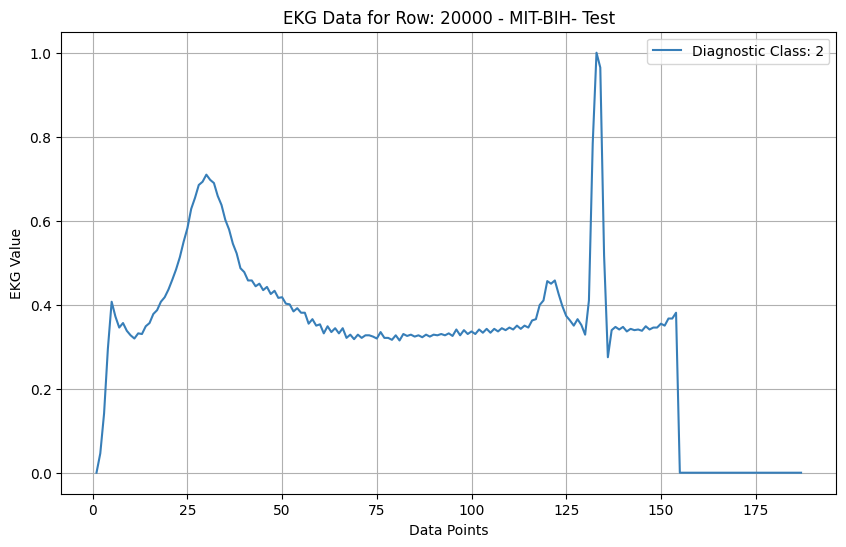

In [31]:
# Grafic Representation of raw Data (Single preprocessed EKG-Signal) - MIT-BIH Test 

# Choose Row to display: 
row_to_display = 20000

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), mitbih_test_df.iloc[row_to_display, :187], 
         label = f"Diagnostic Class: {mitbih_test_df.iloc[row_to_display, 187]}", color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for Row: {row_to_display} - MIT-BIH- Test')
plt.legend()
plt.grid(True)
plt.show();

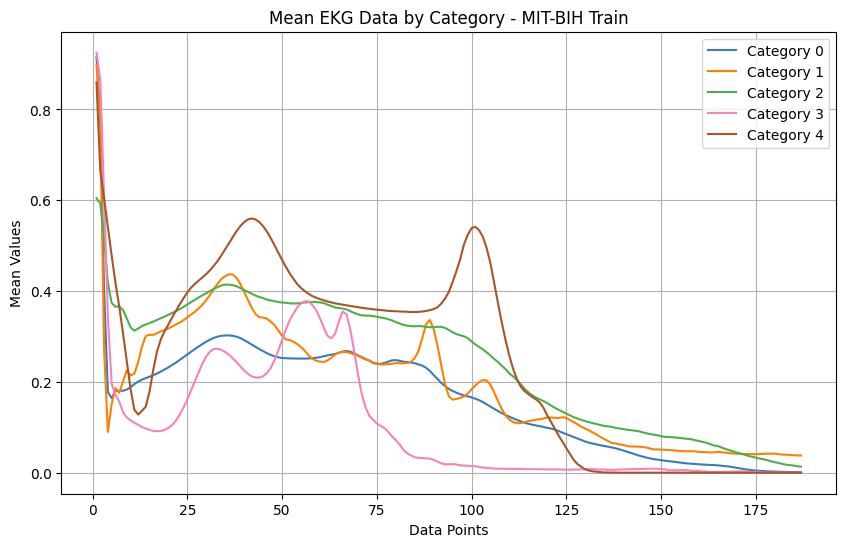

In [32]:
# Grafic representation of the mean values over the Categories - MIT-BIH - Train

# Group by the category in the column named '188'
grouped = mitbih_train_df.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH Train')
plt.legend()
plt.grid(True)
plt.show()

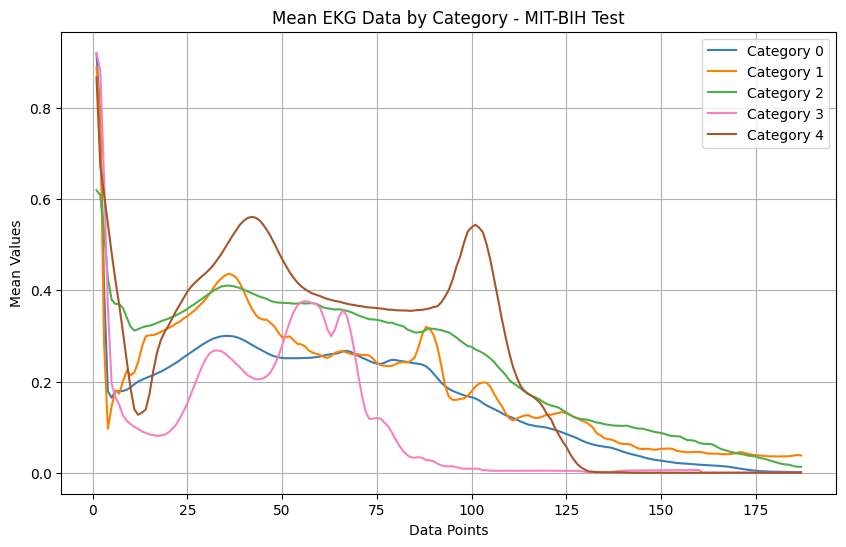

In [33]:
# Grafic representation of the mean values over the Categories - MIT-BIH - Test

# Group by the category in the column named '188'
grouped = mitbih_test_df.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH Test')
plt.legend()
plt.grid(True)
plt.show()

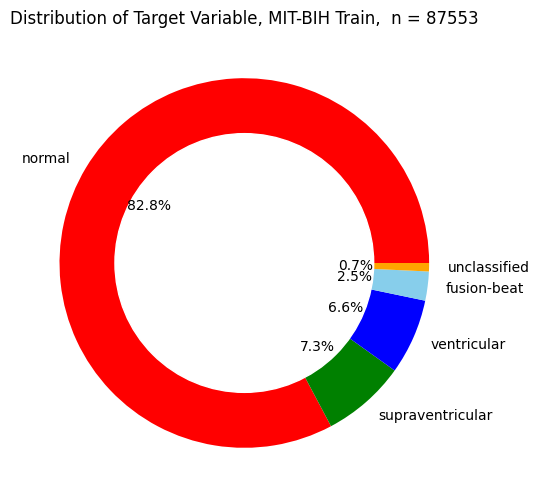

In [34]:
# Distribution of Classes in MIT-BIH-Train

equilibre=mitbih_train_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "supraventricular", "ventricular", "fusion-beat", "unclassified"], 
        colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f"Distribution of Target Variable, MIT-BIH Train,  n = {mitbih_train_df.shape[0]}")
plt.show();

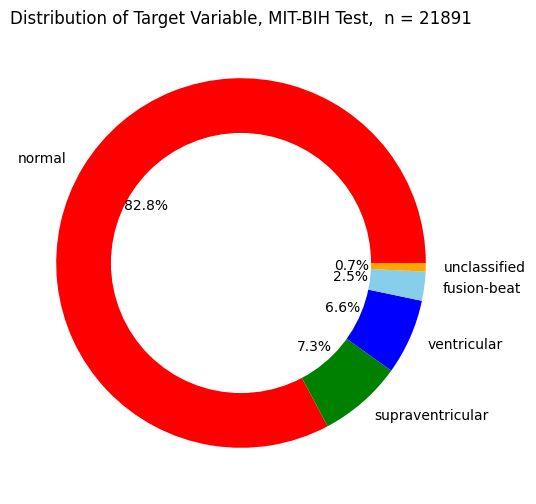

In [35]:
# Distribution of Classes in MIT-BIH-Test

equilibre=mitbih_test_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "supraventricular", "ventricular", "fusion-beat", "unclassified"], 
        colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f"Distribution of Target Variable, MIT-BIH Test,  n = {mitbih_test_df.shape[0]}")
plt.show();

### **Histograms for Data Density - MIT-BIH Train**

In [36]:
# 2D-Histogram for classes; Density of Data Distribution

def plot_hist(class_number, size, min_, bins):
    img = mitbih_train_df.loc[mitbih_train_df[188] == class_number].values[:, min_:size]
    img_flatten = img.flatten()
    final1 = np.tile(np.arange(min_, size), img.shape[0])
    
    print(len(final1))
    print(len(img_flatten))
    
    plt.figure(figsize=(12, 6))
    plt.hist2d(final1, img_flatten, bins=(bins, bins), cmap=plt.cm.jet)
    plt.colorbar()
    plt.show()

4710550
4710550


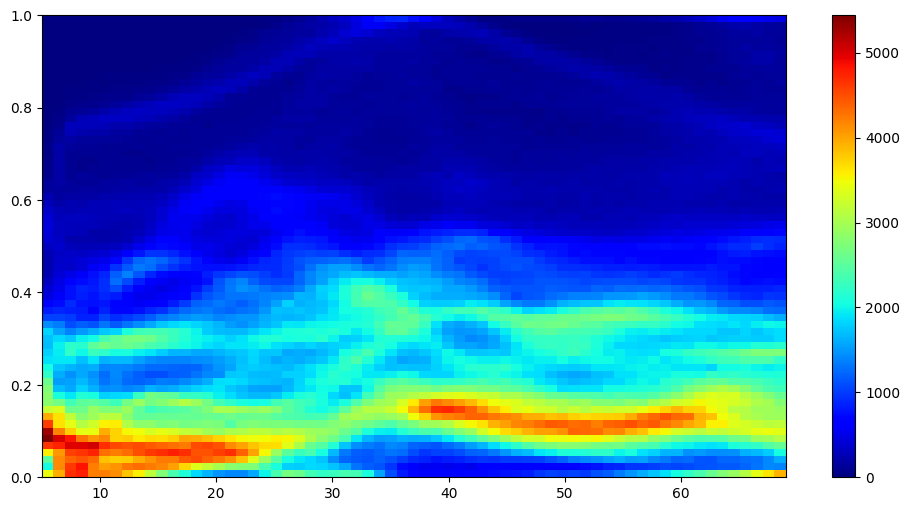

In [37]:
plot_hist(0,70,5,65)

100035
100035


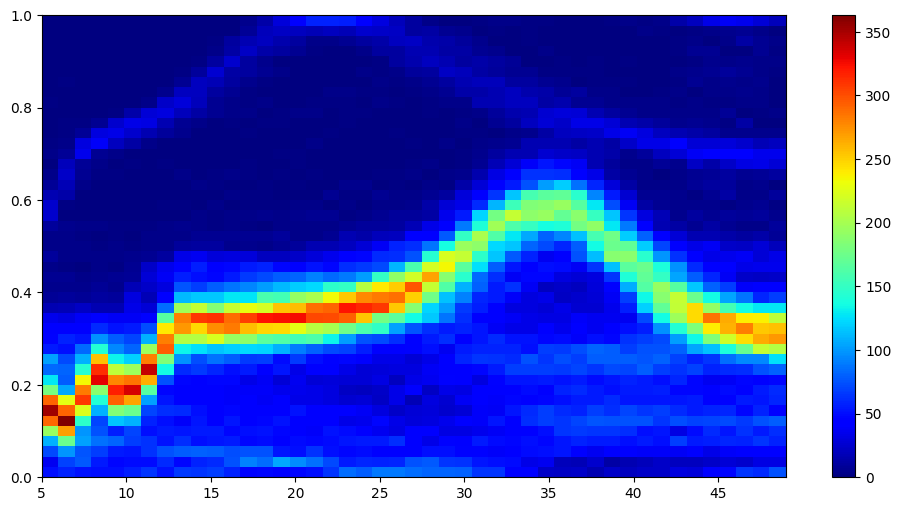

In [38]:
plot_hist(1,50,5,45)

260460
260460


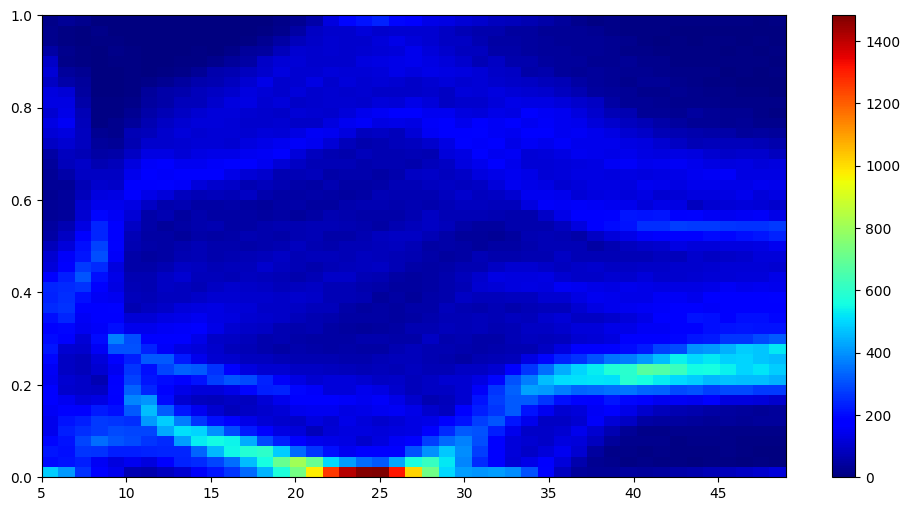

In [39]:
plot_hist(2,50,5,45)

28845
28845


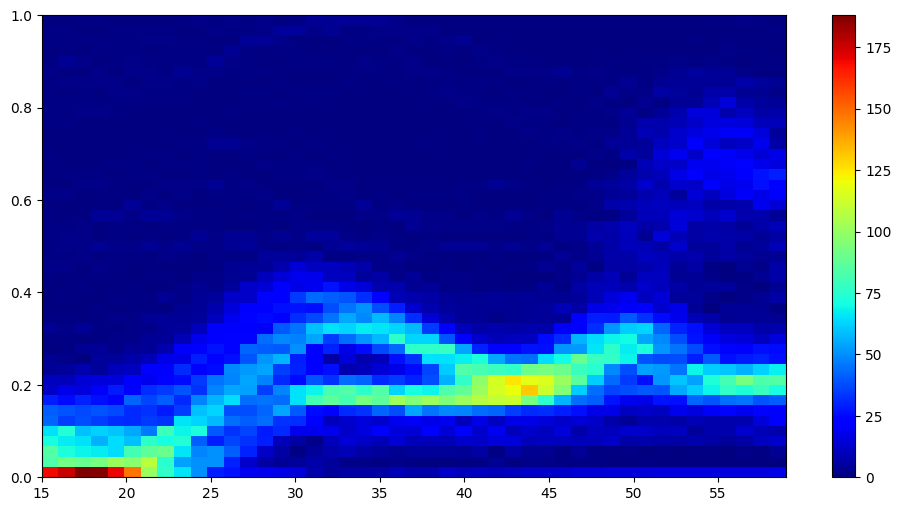

In [40]:
plot_hist(3,60,15,45)

225085
225085


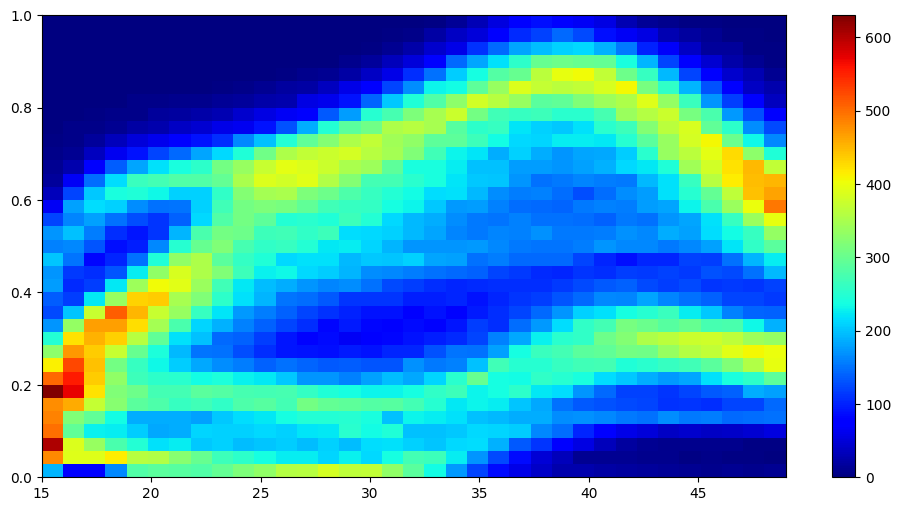

In [41]:
plot_hist(4,50,15,35)

### **First Statistical Evaluation**

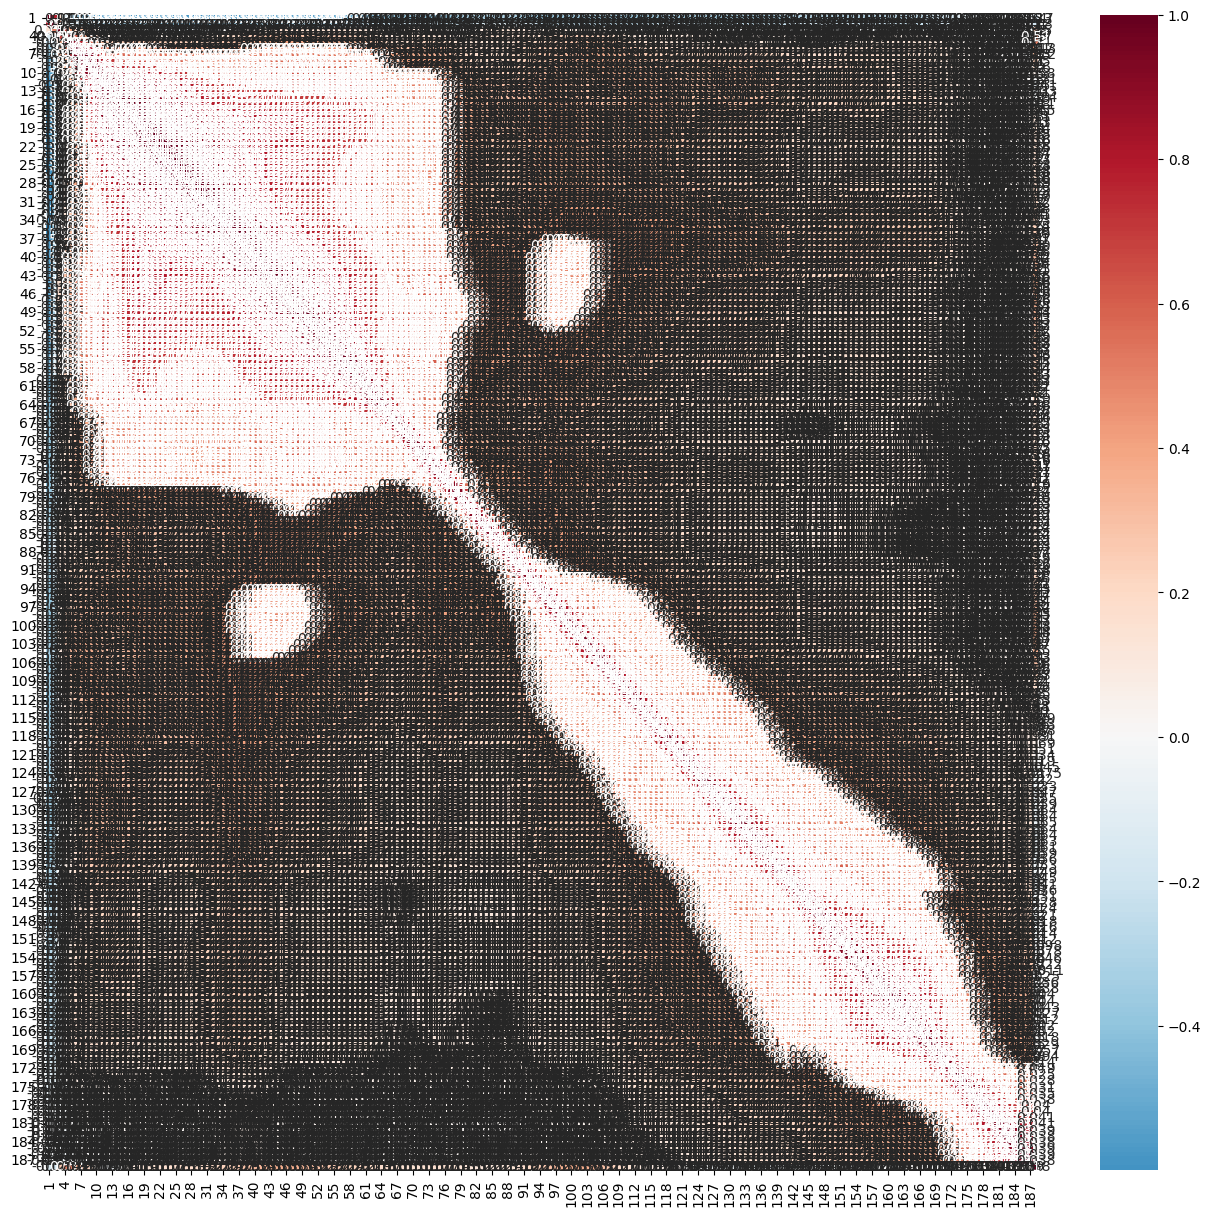

In [42]:
# Pearson Correlation - MIT-BIH Train

#plt.figure(figsize=(16,15))
#sns.heatmap(mitbih_train_df.corr(),  annot=True, cmap="RdBu_r", center =0);

# Does this already qualify as modern art?

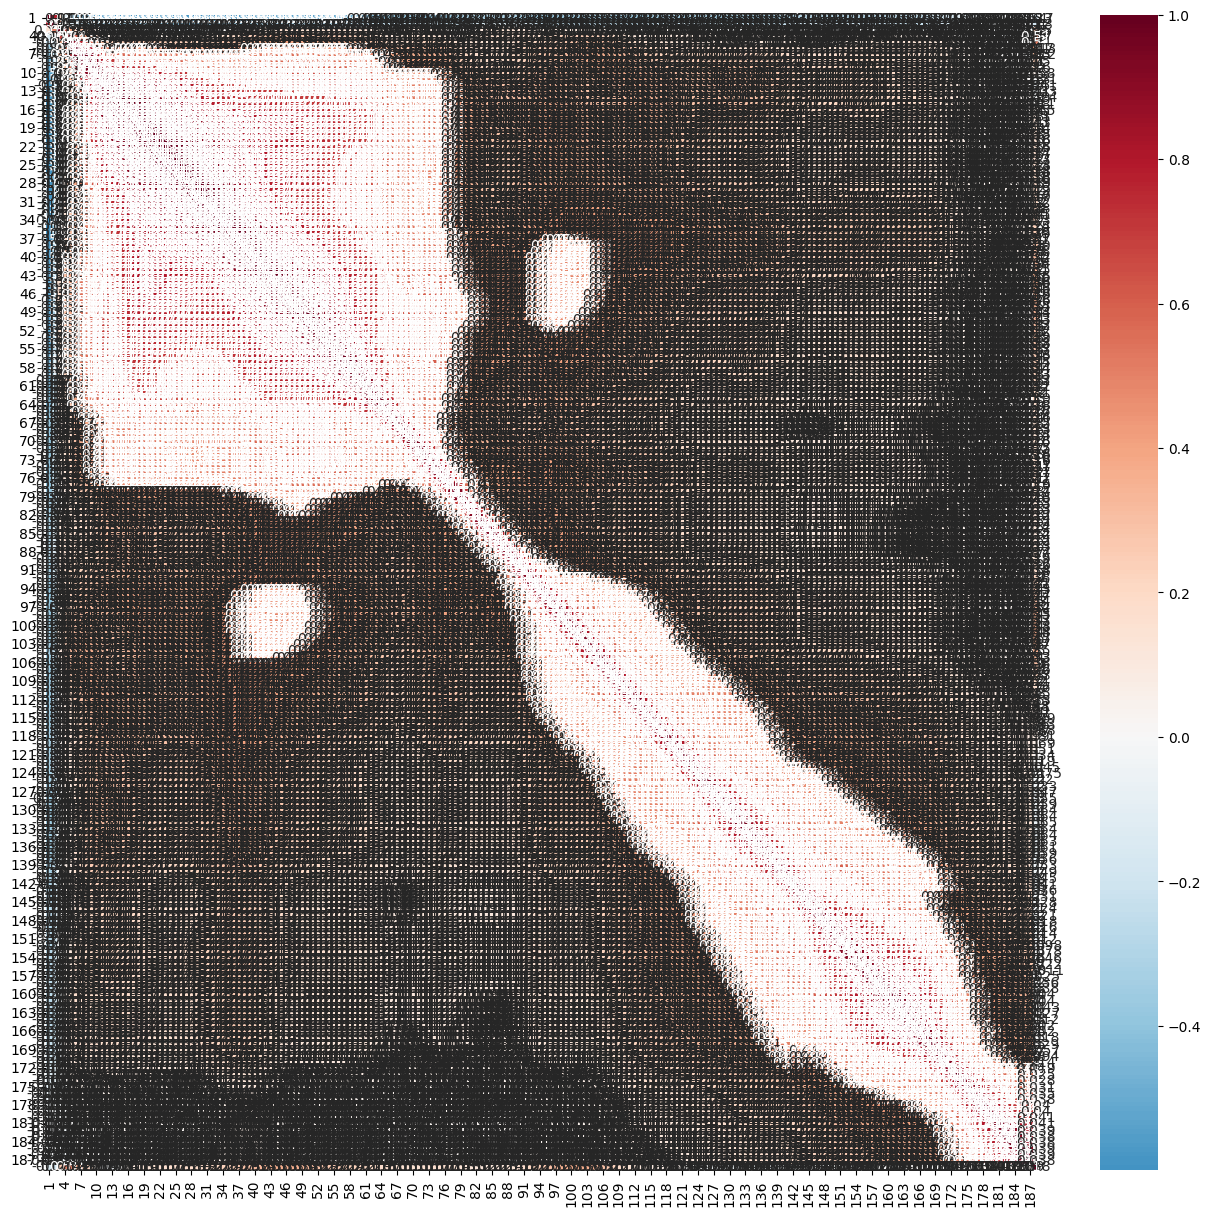

In [43]:
# Pearson Correlation - MIT-BIH Test

#plt.figure(figsize=(16,15))
#sns.heatmap(mitbih_train_df.corr(),  annot=True, cmap="RdBu_r", center =0);


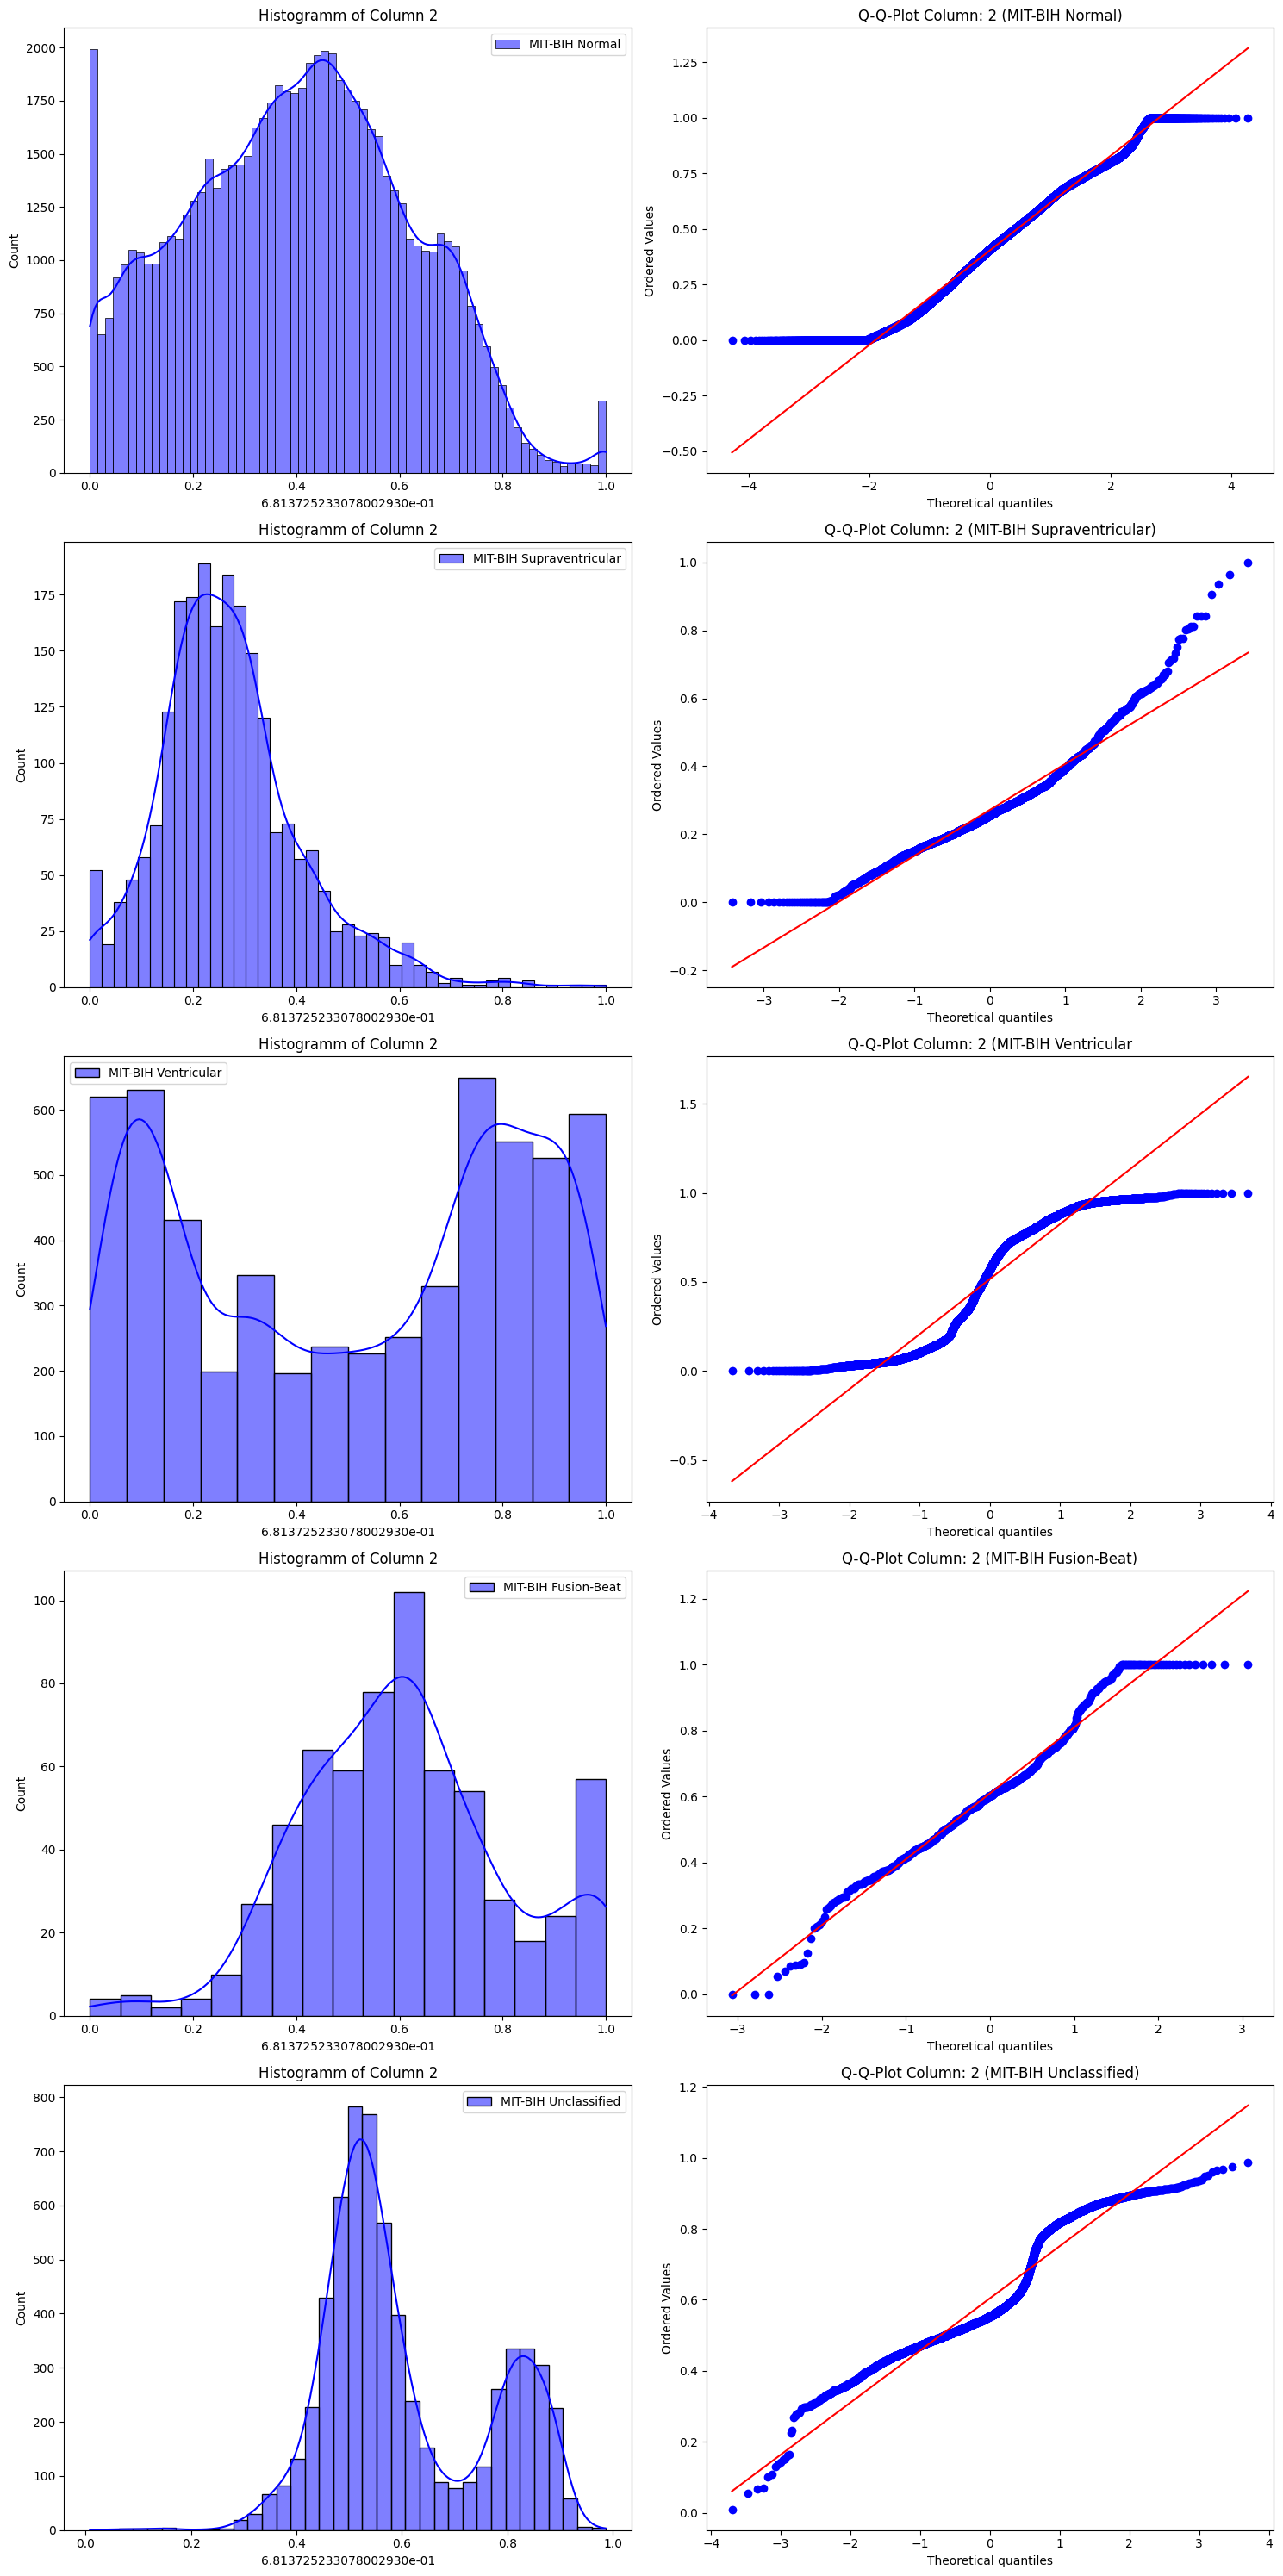

In [48]:
# Normal-Distribution of the explanatory variables? - Visual - MIT-BIH Train
# Seperated by the target variable.

# Choose Column to Check: 
column = 2

X = mitbih_train_df.iloc[:, :-1]  
y = mitbih_train_df.iloc[:, -1]   
normal = X[y == 0]
supraventricular = X[y == 1]
ventricular = X[y == 2]
fusion = X[y == 3]
unlclassified = X[y == 4]

plt.figure(figsize=(15, 30))

plt.subplot(5, 2, 1)
sns.histplot(normal.iloc[:, column], kde=True, color='blue', label='MIT-BIH Normal')
plt.legend()
plt.title(f'Histogramm of Column {column}')

plt.subplot(5, 2, 3)
sns.histplot(supraventricular.iloc[:, column], kde=True, color='blue', label='MIT-BIH Supraventricular')
plt.legend()
plt.title(f'Histogramm of Column {column}')

plt.subplot(5, 2, 5)
sns.histplot(ventricular.iloc[:, column], kde=True, color='blue', label='MIT-BIH Ventricular')
plt.legend()
plt.title(f'Histogramm of Column {column}')

plt.subplot(5, 2, 7)
sns.histplot(fusion.iloc[:, column], kde=True, color='blue', label='MIT-BIH Fusion-Beat')
plt.legend()
plt.title(f'Histogramm of Column {column}')

plt.subplot(5, 2, 9)
sns.histplot(unlclassified.iloc[:, column], kde=True, color='blue', label='MIT-BIH Unclassified')
plt.legend()
plt.title(f'Histogramm of Column {column}')

plt.subplot(5, 2, 2)
stats.probplot(normal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column: {column} (MIT-BIH Normal)')

plt.subplot(5, 2, 4)
stats.probplot(supraventricular.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column: {column} (MIT-BIH Supraventricular)')

plt.subplot(5, 2, 6)
stats.probplot(ventricular.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column: {column} (MIT-BIH Ventricular')

plt.subplot(5, 2, 8)
stats.probplot(fusion.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column: {column} (MIT-BIH Fusion-Beat)')

plt.subplot(5, 2, 10)
stats.probplot(unlclassified.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column: {column} (MIT-BIH Unclassified)')

plt.tight_layout()
plt.show()

In [ ]:
# Check for normal Distribution with Shapiro-Wilk-Test (over all Columns)

def check_normality(data, alpha=0.05):
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    return p > alpha, stat, p

normality_results = []
for column in X.columns:
    is_normal_normal_group, stat_normal, p_normal = check_normality(normal[column])
    is_normalabnormal_group, stat_abnormal, p_abnormal = check_normality(abnormal[column])
    normality_results.append({
        'Variable': column,
        'is_normal_normal_group': is_normal_normal_group,
        'ks_stat_normal': stat_normal,
        'p_val_normal': p_normal,
        'is_normal_abnormal_group': is_normal_abnormal_group,
        'ks_stat_abnormal': stat_abnormal,
        'p_val_abnormal': p_abnormal
    })

results_df = pd.DataFrame(normality_results)

# Sort results if needed: 
# sorted_results_df = results_df.sort_values(by='p_val_normal')

# Data filtering to identify variables:
filtered_results_df = results_df[
    (results_df['is_normal_normal_group'] == True) &
    (results_df['is_normal_abnormal_group'] == True)]

results_df.head()
filtered_results_df.info()

# None of the explanatory variables is normal distributed. 

MIT-BIH- Summary: 
- Potential distortion from cropping, (downsampling) and padding with zeros; The QRS-Complexes are not zentered; 
some entries contain no valuable information (1120); peak at Column 1-5; 
- no missing values
- the values of all explanatory variables are normalized continous variables with values between 0 and 1
- the target-variable is a nominal categorical variable (0-4)
- Numbe of entries: Test-Dataset: 21k; Train-Dataset: 87k
- All Data: Float 64
- Variable 1-187: Features; Variable 188: Target (0-4)


### **First Conclusions** !!!
- 14550 Entries; Normal: 4045 (27,8%); Abnormal: 10505
- There are no missing values
- The values of all explanatory variables are normalized continous variables with values between 0 and 1
- The target variable is a nominal categorical variable with a value of 0 or 1
- None of the explanatory variables is normal distributed (Shapiro-Wilk-Test)

### **Challenges** !!!
- There is a potential distortion from cropping, (downsampling) and padding with zeros
- The QRS-Complexes are not centered
- peak at Column 1-3; 
- A further challenge is that the distinction between pathologies is only possible when using the original dataset (with the kaggle Dataset there is "only" Normal and Abnormal)
- Structural problem of "only" a heatbeat, Normal EKG-Data contains more than one heartbeat because it has diagnostic relevance